<a href="https://colab.research.google.com/github/dilinanp/computational-physics/blob/main/estimating_pi_using_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate 100,000 random numbers uniformly distributed in the interval $[0, 1)$. Then, plot a histogram of the numbers.

Text(0, 0.5, 'frequency')

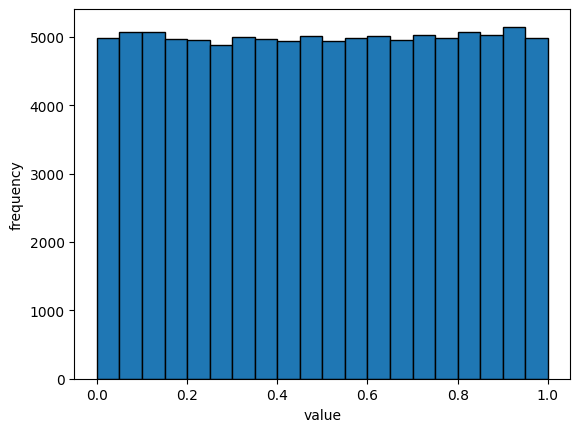

In [2]:
rand_nums = np.random.rand(100000)

plt.hist(rand_nums, bins=20, edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')

### Generate 100,000 random numbers uniformly distributed in the interval $[2, 5)$. Then, plot a histogram of the numbers.

(array([ 9833., 10115.,  9991.,  9849., 10156., 10186.,  9905.,  9996.,
         9824., 10145.]),
 array([2.00000044, 2.29998908, 2.59997772, 2.89996636, 3.199955  ,
        3.49994365, 3.79993229, 4.09992093, 4.39990957, 4.69989821,
        4.99988685]),
 <BarContainer object of 10 artists>)

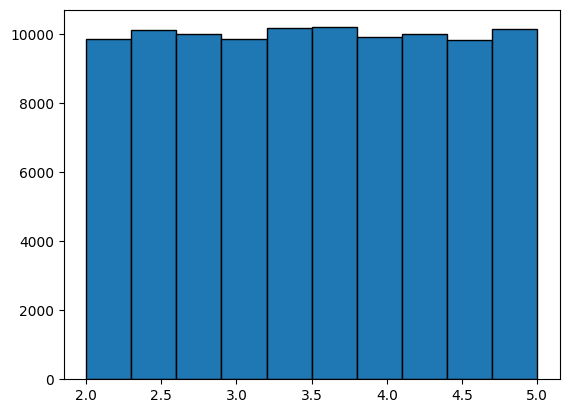

In [3]:
a = 2
b = 5

rand_nums = (b-a)*np.random.rand(100000) + a   # [0, 1) -> [a, b)
plt.hist(rand_nums, edgecolor='black')

## Setting a random seed

In [4]:
np.random.seed(42)

np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

________________________________________________________________________________
## Use a simple-sampling Monte Carlo method to estimate the value of $\pi$. Then compare your result to the established value of $\pi$ by calculating the *percent error*.

In [5]:
def calc_pi(N):
  x_values = 2*np.random.rand(N) - 1
  y_values = 2*np.random.rand(N) - 1

  N_hits = 0

  for x, y in zip(x_values, y_values):
    if x**2 + y**2 < 1:
      N_hits += 1

  pi = 4*N_hits/N

  return pi

In [6]:
num_dart_throws = 1000000
pi = calc_pi(num_dart_throws)

percent_error = abs(np.pi-pi)/np.pi*100

print(f'pi = {pi}')
print(f'percent error = {percent_error}')

pi = 3.139892
percent error = 0.05413348506050613


## Use NumPy's vectorization capabilities to write an alternative version of the `calc_pi()` function that does not use loops. Then compare your result to the established value of $\pi$ by calculating the *percent error*.

In [7]:
def calc_pi_cool(N):
  x_values = 2*np.random.rand(N) - 1
  y_values = 2*np.random.rand(N) - 1

  return 4*(x_values**2 + y_values**2 < 1).mean()

In [8]:
num_dart_throws = 1000000
pi = calc_pi_cool(num_dart_throws)

percent_error = abs(np.pi-pi)/np.pi*100

print(f'pi = {pi}')
print(f'percent error = {percent_error}')

pi = 3.139388
percent error = 0.07017630332417815


## Repeat your Monte Carlo simulation 10 times. Use $N=10,000$ darts throws.
- ## Calculate the mean value of $\pi$ and the standard uncertainty of the mean from the 10 estimates.
- ## Then compare your mean value to the established value of $\pi$ by calculating the percent error.

In [9]:
num_runs = 10 # Number of independent runs
N = 10000 # Number of dart throws

pi_values = []

for i in range(num_runs):
  pi = calc_pi(N)
  pi_values.append(pi)

mean_pi = np.mean(pi_values)
unc_pi = np.std(pi_values, ddof=1)/np.sqrt(num_runs)

print(f'pi = {mean_pi:.3f} +/- {unc_pi:.3f}')

pi = 3.143 +/- 0.006


### Repeat the calculation for $N = 10^3, 10^4, 10^5$, and $10^6$. Then plot percent error as a function of $N$.

In [ ]:
N_values = [1000, 10000, 100000, 1000000]

for N in N_values:
 # Complete your code